## **Binary Classification: Confusion Matrix**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


## **data source**
https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


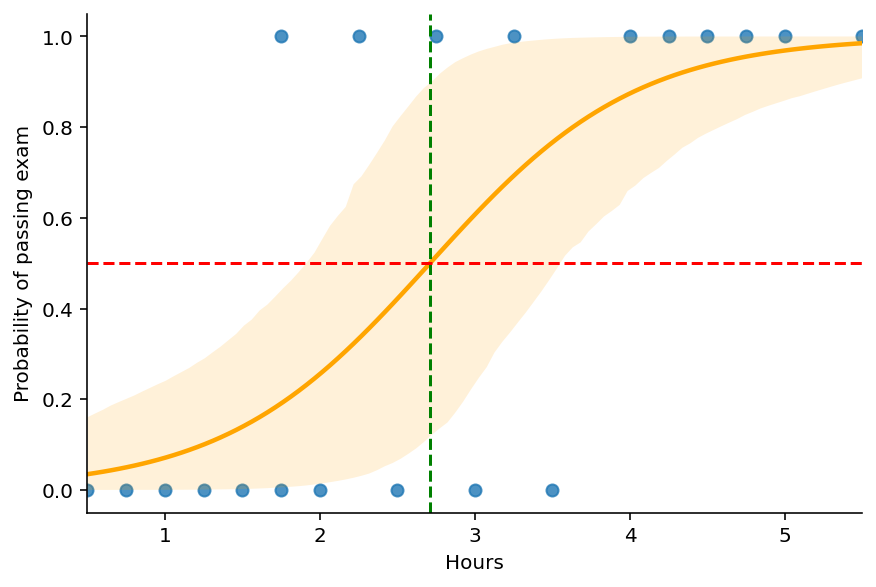

In [5]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam');
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

# **Scikit-learn: LogisticRegression**
doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegr

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
print(f"sklearn version = {sklearn.__version__}")

sklearn version = 0.22.2.post1


In [8]:
X_train = df[['Hours']]
y_train = df.Pass

In [9]:
X_train # pandas DataFrame

,Hours
0,0.50
1,0.75
2,1.00
3,1.25
4,1.50
5,1.75
6,1.75
7,2.00
8,2.25
9,2.50


In [10]:
y_train # pandas Series

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    1
Name: Pass, dtype: int64

In [11]:
model = LogisticRegression()
# model = LogisticRegression(C=1e10) # minimize regularization
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.score(X_train, y_train) # accuracy of the model

0.8

In [14]:
predicted = model.predict(X_train)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
y_train.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

## **Confusion matrix**

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score


# **further reading:**

* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
* https://en.wikipedia.org/wiki/Confusion_matrix

In [17]:
X_train['Hours'].values

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ])

In [18]:
y_train.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [19]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
cm=confusion_matrix(y_train, predicted)
cm


array([[8, 2],
       [2, 8]])

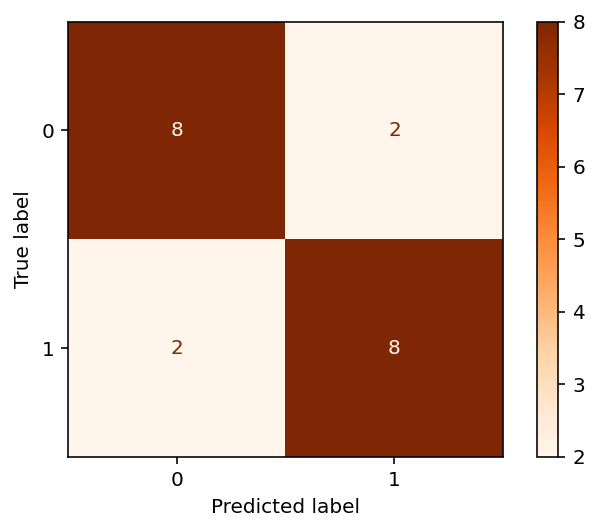

In [21]:
plot_confusion_matrix(model, X_train, y_train, cmap='Oranges')

# scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} &amp; C_{0,1} \\
C_{1,0} &amp; C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&amp;fp \\
fn&amp;tp
\end{bmatrix}
$$
predicted false	predicted true
actual false	tn	fp
actual true	fn	tp


In [22]:
pd.crosstab(y_train, predicted, rownames=['Actual'], colnames=['Predicted'], margins=True, margins_name='Total')

Predicted,0,1,Total
Actual,,,
0,8,2,10
1,2,8,10
Total,10,10,20


In [23]:
dd=pd.DataFrame({'actual': y_train.values, 'predicted': predicted})
dd

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,0
9,0,0


In [24]:
pd.crosstab(dd['actual'], dd['predicted'])

predicted,0,1
actual,,
0,8,2
1,2,8


In [25]:
metrics.confusion_matrix(y_train, predicted)

array([[8, 2],
       [2, 8]])

In [26]:
pd.DataFrame(metrics.confusion_matrix(y_train, predicted), 
             columns=['pred_fail', 'pred_pass'],
             index=['actual_fail', 'actual_pass'])

,pred_fail,pred_pass
actual_fail,8,2
actual_pass,2,8


In [27]:
def pretty_confusion_matrix(cm_array):
    '''
    add labels and grand total to sklearn confusion matrix (2 x 2)
    '''
    df=pd.DataFrame(cm_array, 
                   columns=['pred_fail', 'pred_pass'], 
                   index=['actual_fail', 'actual_pass'])
    
    index_labels=df.index.tolist()
    df=df.append(df.sum(axis=0), ignore_index=True)
    df.index=index_labels + ['total']
    df['total']=df.sum(axis=1)
    return df

In [28]:
pretty_confusion_matrix(metrics.confusion_matrix(y_train, predicted))

,pred_fail,pred_pass,total
actual_fail,8,2,10
actual_pass,2,8,10
total,10,10,20


In [29]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()

$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [30]:
(tp+tn)/(tp+tn+fp+fn) # accuracy score

0.8

In [31]:
metrics.accuracy_score(y_train, predicted)


0.8

In [32]:
metrics.precision_score(y_train, predicted)

0.8

In [33]:
tp/(tp+fp) # precision score

0.8

In [34]:
metrics.recall_score(y_train, predicted)

0.8

In [35]:
tp/(tp+fn) # recall score

0.8

In [36]:
metrics.f1_score(y_train, predicted)

0.8000000000000002

In [37]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [38]:
tn/(tn+fn) # precision (class=0)

0.8

In [39]:
tn/(tn+fp) # recall (class=0)

0.8